In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import os

In [3]:
alpha = 1
beta = 0

# initial step size
eta0 = 1
# initial probability for beta > 0
prob0 = 0.5
# initial probability for beta = 0
prob00 = 0.1


dim = 2
n_client = 5
mu = 1
var = 1

In [4]:
# generate the problem
prob_seed = 7
np.random.seed(prob_seed)
mat_S_list = []
vec_b_list = []
for i in range(n_client):
    mat_tmp = np.random.randn(dim, dim) / np.sqrt(dim)
    mat_tmp = mat_tmp @ mat_tmp.T
    mat_tmp = mat_tmp + mu * np.identity(dim)
    mat_S_list.append(mat_tmp)
    vec_b_list.append(np.random.randn(dim))
mat_S = np.array(mat_S_list)
vec_b = np.array(vec_b_list)
print(mat_S.shape)
print(vec_b.shape)
    
# mat_A = np.random.randn(d1, d1 - d2)
# proj_A = mat_A @ np.linalg.inv(mat_A.T @ mat_A) @ mat_A.T
# proj_A_bot = np.identity(d1) - proj_A
# print(proj_A_bot @ proj_A_bot - proj_A_bot)

(5, 2, 2)
(5, 2)


In [5]:
# solve the problem
mat_S_ave = np.mean(mat_S, axis=0)
vec_b_ave = np.mean(vec_b, axis=0)
sol = np.linalg.inv(mat_S_ave) @ vec_b_ave
print(sol)

[-0.03727952  0.14768242]


In [58]:

alpha_list = [1.0, 0.8, 0.6]
# alpha_list = [1.0]
# alpha_list = [0.8, 0.6]
beta_list = [0.0, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8]

# seed = 0
# eta0 = 1 # initial value for alpha = 1
# # eta0 = 0.5
# eta00 = 0.1 # initial value for alpha < 1

# seed = 1
eta0 = 1
eta00 = 0.2

prob00 = 0.1 # initial value for beta = 0
prob0 = 0.5 # initial value for beta > 0
n_ite = 10000
n_rep = 10

store_path = '../workspace/LPSA/fl_mse_seed' + str(prob_seed) + '/'

# np.random.seed(0)
# x00 = np.random.randn(n_client, dim)

for alpha in alpha_list:
    for beta in beta_list:
        para = 'alpha' + str(alpha) + 'beta' + str(beta)
        path = store_path + para + '/'
        if not os.path.exists(path):
            os.makedirs(path)
            
        if alpha > 0.99:
            eta_ini = eta0
        else:
            eta_ini = eta00
        # print(eta_ini)

        for j in range(n_rep):
            np.random.seed(j)
            x0 = np.random.randn(n_client, dim)
            u_list = []
            v_list = []
            mse_list = []
            loss_list = []
            eta_list = []
            f_list = []
            x = x0
            for i in range(n_ite):
                eta = eta_ini / (i+1) ** alpha
                noise = np.sqrt(var) * np.random.randn(n_client, dim)
#                 print(mat_S.shape, x.shape)
                grad = np.sum(mat_S * np.expand_dims(x, axis=1).repeat(dim, axis=1), axis=2) - vec_b
                x = x - eta * (grad + noise)
                u = np.mean(x, axis=0)

                if beta > 0.01:
                    prob = prob0 * eta ** beta
                else:
                    prob = prob00
                prob = min(prob, 1)
                f = np.random.binomial(1, prob)

                if f > 0:
                    x = np.repeat(np.expand_dims(u, axis=0), 5, axis=0)
                v = x - u
                u_list.append(u - sol)
                v_list.append(v)
                mse = np.linalg.norm(u - sol) ** 2
#                 loss = np.dot(mat_S @ u, u) / 2 - np.dot(u, vec_b)
                mse_list.append(mse)
#                 loss_list.append(loss - loss_min)
                eta_list.append(eta)
                f_list.append(f)

            np.save(path + 'mse' + str(j) + '.npy', np.array(mse_list))
#             np.save(path + 'loss' + str(j) + '.npy', np.array(loss_list))
            np.save(path + 'eta' + str(j) + '.npy', np.array(eta_list))
            np.save(path + 'u' + str(j) + '.npy', np.array(u_list))
            np.save(path + 'v' + str(j) + '.npy', np.array(v_list))
            np.save(path + 'f' + str(j) + '.npy', np.array(f_list))

        print(para, j, 'done\n')

alpha1.0beta0.0 9 done

alpha1.0beta0.2 9 done

alpha1.0beta0.4 9 done

alpha1.0beta0.5 9 done

alpha1.0beta0.6 9 done

alpha1.0beta0.7 9 done

alpha1.0beta0.8 9 done

alpha0.8beta0.0 9 done

alpha0.8beta0.2 9 done

alpha0.8beta0.4 9 done

alpha0.8beta0.5 9 done

alpha0.8beta0.6 9 done

alpha0.8beta0.7 9 done

alpha0.8beta0.8 9 done

alpha0.6beta0.0 9 done

alpha0.6beta0.2 9 done

alpha0.6beta0.4 9 done

alpha0.6beta0.5 9 done

alpha0.6beta0.6 9 done

alpha0.6beta0.7 9 done

alpha0.6beta0.8 9 done



In [90]:
# debias

alpha_list = [1.0, 0.8, 0.6]
# alpha_list = [1.0]
# alpha_list = [0.8, 0.6]
beta_list = [0.0, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8]

# seed = 0
# eta0 = 1 # initial value for alpha = 1
# # eta0 = 0.5
# eta00 = 0.1 # initial value for alpha < 1

# seed = 1
eta0 = 1
eta00 = 0.2

prob00 = 0.1 # initial value for beta = 0
prob0 = 0.5 # initial value for beta > 0
n_ite = 10000
n_rep = 10

store_path = '../workspace/LPSA/fl_mse_debias_seed' + str(prob_seed) + '/'

# np.random.seed(0)
# x00 = np.random.randn(n_client, dim)

for alpha in alpha_list:
    for beta in beta_list:
        if beta > 0.01:
            gamma = prob0
        else:
            gamma = prob00
        para = 'alpha' + str(alpha) + 'beta' + str(beta)
        path = store_path + para + '/'
        if not os.path.exists(path):
            os.makedirs(path)
            
        if alpha > 0.99:
            eta_ini = eta0
        else:
            eta_ini = eta00
        # print(eta_ini)

        for j in range(n_rep):
            np.random.seed(j)
            x0 = np.random.randn(n_client, dim)
            u_list = []
            v_list = []
            mse_list = []
            loss_list = []
            eta_list = []
            f_list = []
            x = x0
            for i in range(n_ite):
                eta = eta_ini / (i+1) ** alpha
                if i < 100:
                    noise = np.sqrt(var) * np.random.randn(n_client, dim)
                    grad = np.sum(mat_S * np.expand_dims(x, axis=1).repeat(dim, axis=1), axis=2) - vec_b
                    x = x - eta * (grad + noise)
                else:
                    noise = np.sqrt(var) * np.random.randn(2, n_client, dim)
                    noise1 = noise[0,:,:]
                    noise2 = noise[1,:,:]
                    grad = np.sum(mat_S * np.expand_dims(x, axis=1).repeat(dim, axis=1), axis=2) - vec_b
                    x_grad = x + eta ** (1 - beta) * (grad + noise1) / gamma
                    grad2 = np.sum(mat_S * np.expand_dims(x_grad, axis=1).repeat(dim, axis=1), axis=2) - vec_b
                    x = x - eta * (grad2 + noise2)
                u = np.mean(x, axis=0)

                if beta > 0.01:
                    prob = prob0 * eta ** beta
                else:
                    prob = prob00
                prob = min(prob, 1)
                f = np.random.binomial(1, prob)

                if f > 0:
                    x = np.repeat(np.expand_dims(u, axis=0), 5, axis=0)
                v = x - u
                u_list.append(u - sol)
                v_list.append(v)
                mse = np.linalg.norm(u - sol) ** 2
#                 loss = np.dot(mat_S @ u, u) / 2 - np.dot(u, vec_b)
                mse_list.append(mse)
#                 loss_list.append(loss - loss_min)
                eta_list.append(eta)
                f_list.append(f)

            np.save(path + 'mse' + str(j) + '.npy', np.array(mse_list))
#             np.save(path + 'loss' + str(j) + '.npy', np.array(loss_list))
            np.save(path + 'eta' + str(j) + '.npy', np.array(eta_list))
            np.save(path + 'u' + str(j) + '.npy', np.array(u_list))
            np.save(path + 'v' + str(j) + '.npy', np.array(v_list))
            np.save(path + 'f' + str(j) + '.npy', np.array(f_list))

        print(para, j, 'done\n')

alpha1.0beta0.0 9 done

alpha1.0beta0.2 9 done

alpha1.0beta0.4 9 done

alpha1.0beta0.5 9 done

alpha1.0beta0.6 9 done

alpha1.0beta0.7 9 done

alpha1.0beta0.8 9 done

alpha0.8beta0.0 9 done

alpha0.8beta0.2 9 done

alpha0.8beta0.4 9 done

alpha0.8beta0.5 9 done

alpha0.8beta0.6 9 done

alpha0.8beta0.7 9 done

alpha0.8beta0.8 9 done

alpha0.6beta0.0 9 done

alpha0.6beta0.2 9 done

alpha0.6beta0.4 9 done

alpha0.6beta0.5 9 done

alpha0.6beta0.6 9 done

alpha0.6beta0.7 9 done

alpha0.6beta0.8 9 done



<Figure size 640x480 with 0 Axes>

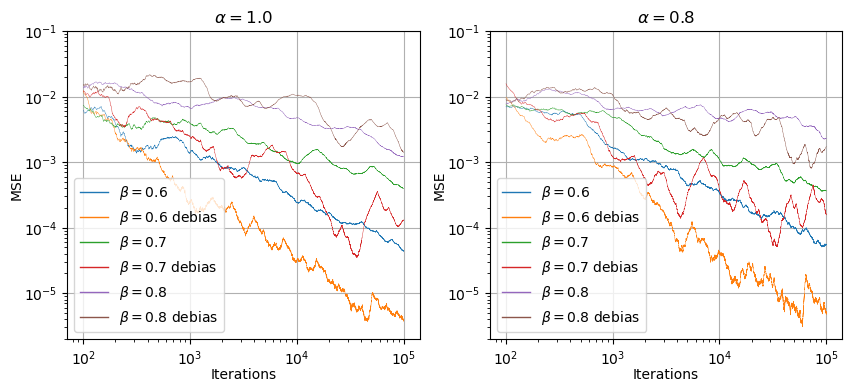

In [29]:
# plot: debias


s = 100
# num_ite = 10000
num_ite = 100000
# beta_list = [0.0, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8]
# load_path = '../workspace/LPSA/mse_seed' + str(prob_seed) + '/'
load_path = '../workspace/LPSA/fl_mse_seed' + str(prob_seed) + '/'
load_path_de = '../workspace/LPSA/fl_mse_debias_seed' + str(prob_seed) + '/'


plt.clf()
j = 0
plt.figure(figsize = (10, 4))
plt.subplots_adjust(hspace=0.3)

for alpha in [1.0, 0.8]:
    j = j + 1
#     ax1 = plt.subplot(2, 2, j)
# #     for beta in beta_list:
#     for beta in [0.0, 0.2, 0.4, 0.5]:
#         u_data = []
#         u_data_de = []
#         para = 'alpha' + str(alpha) + 'beta' + str(beta)
# #         alpha = para[2:5]
# #         beta = para[9:]
#         path = load_path + para + '/' 
#         path_de = load_path_de + para + '/'
#         for i in range(n_rep):
#             u_data.append(np.load(path + 'mse' + str(i) + '.npy'))
#             u_data_de.append(np.load(path_de + 'mse' + str(i) + '.npy'))
#         u_data = np.array(u_data)
#         u_data = np.mean(u_data, 0)
#         u_data_de = np.array(u_data_de)
#         u_data_de = np.mean(u_data_de, 0)
#         legend_tmp = r'$\beta=$' + str(beta)
#         legend_tmp_de = r'$\beta=$' + str(beta) + ' debias'
#         plt.loglog(np.arange(len(u_data))[s:num_ite], u_data[s:num_ite], label=legend_tmp, linewidth=0.3)
#         plt.loglog(np.arange(len(u_data))[s:num_ite], u_data_de[s:num_ite], label=legend_tmp_de, linewidth=0.3)
#     leg = plt.legend()
#     for line in leg.get_lines():
#         line.set_linewidth(1)
#     plt.grid()
#     plt.xlabel('Iterations', labelpad=0.5)
#     plt.ylabel('MSE', labelpad=0)
# #     plt.ylim([1e-6, 1e-0])
#     plt.title(r'$\alpha=$' + str(alpha))
    
    ax1 = plt.subplot(1, 2, j)
    for beta in [0.6, 0.7, 0.8]:
        u_data = []
        u_data_de = []
        para = 'alpha' + str(alpha) + 'beta' + str(beta)
#         alpha = para[2:5]
#         beta = para[9:]
        path = load_path + para + '/' 
        path_de = load_path_de + para + '/'
        for i in range(n_rep):
            u_data.append(np.load(path + 'mse' + str(i) + '.npy'))
            u_data_de.append(np.load(path_de + 'mse' + str(i) + '.npy'))
        u_data = np.array(u_data)
        u_data = np.mean(u_data, 0)
        u_data_de = np.array(u_data_de)
        u_data_de = np.mean(u_data_de, 0)
        legend_tmp = r'$\beta=$' + str(beta)
        legend_tmp_de = r'$\beta=$' + str(beta) + ' debias'
        plt.loglog(np.arange(len(u_data))[s:num_ite], u_data[s:num_ite], label=legend_tmp, linewidth=0.3)
        plt.loglog(np.arange(len(u_data))[s:num_ite], u_data_de[s:num_ite], label=legend_tmp_de, linewidth=0.3)
    leg = plt.legend()
    for line in leg.get_lines():
        line.set_linewidth(1)
    plt.grid()
    plt.xlabel('Iterations', labelpad=0.5)
    plt.ylabel('MSE', labelpad=0)
    plt.ylim([2e-6, 1e-1])
    plt.title(r'$\alpha=$' + str(alpha))

plt.savefig('./figs/fl_debias.pdf', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

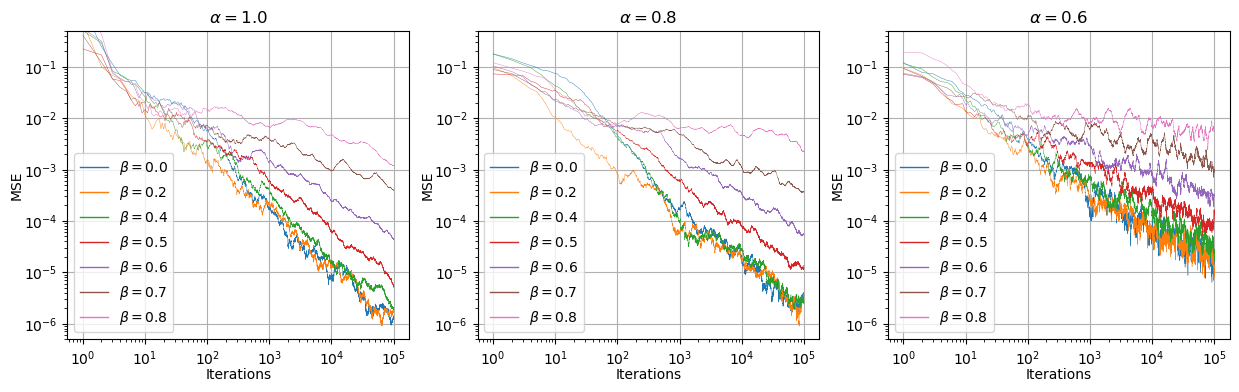

In [28]:
# plot: convergence rate

# prob_seed=2
n_rep = 10
s = 1
# num_ite = 10000
num_ite = 100000
beta_list = [0.0, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8]
# load_path = '../workspace/LPSA/mse_seed' + str(prob_seed) + '/'
load_path = '../workspace/LPSA/fl_mse_seed' + str(prob_seed) + '/'

plt.clf()
j = 0
plt.figure(figsize = (15, 4))
for alpha in [1.0, 0.8, 0.6]:
    j = j + 1
    ax1 = plt.subplot(1, 3, j)
    for beta in beta_list:
        u_data = []
        para = 'alpha' + str(alpha) + 'beta' + str(beta)
#         alpha = para[2:5]
#         beta = para[9:]
        path = load_path + para + '/' 
        for i in range(n_rep):
            u_data.append(np.load(path + 'mse' + str(i) + '.npy'))
        u_data = np.array(u_data)
        u_data = np.mean(u_data, 0)
        legend_tmp = r'$\beta=$' + str(beta)
        plt.loglog(np.arange(len(u_data))[s:num_ite], u_data[s:num_ite], label=legend_tmp, linewidth=0.3)
    leg = plt.legend()
    for line in leg.get_lines():
        line.set_linewidth(1)
    plt.grid()
    plt.xlabel('Iterations', labelpad=0.5)
    plt.ylabel('MSE', labelpad=0)
    plt.ylim([5e-7, 5e-1])
    plt.title(r'$\alpha=$' + str(alpha))

plt.savefig('./figs/fl_convergence.pdf', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

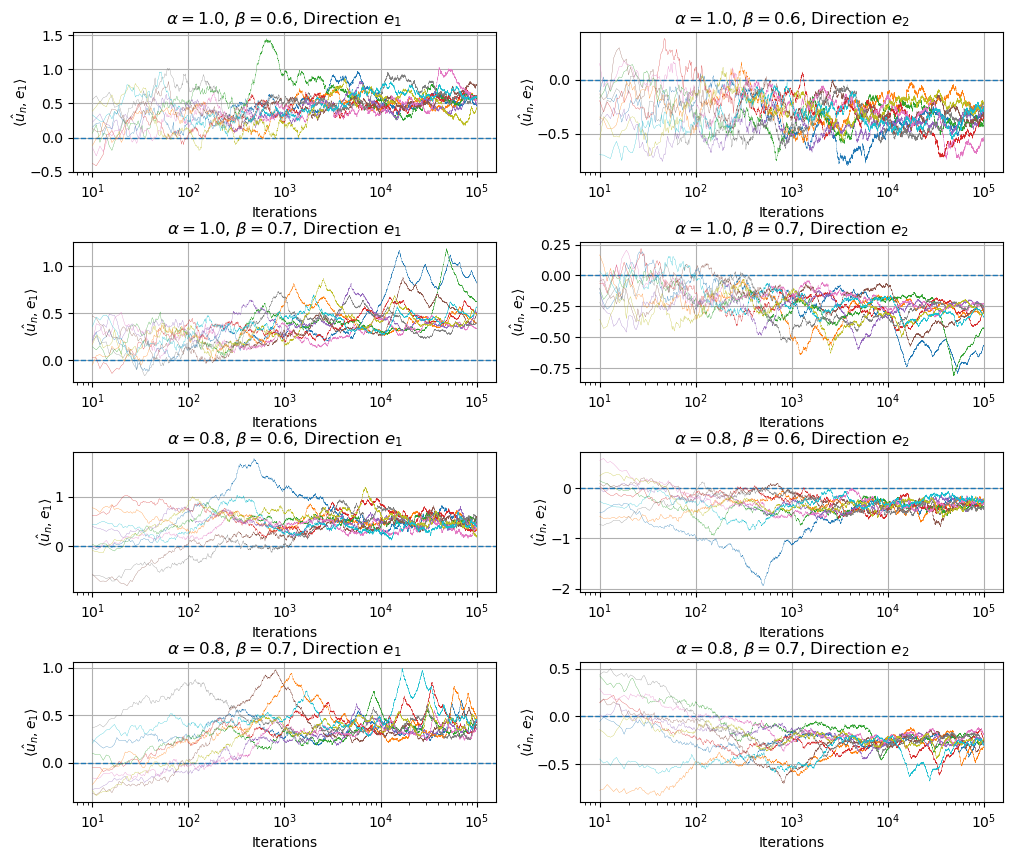

In [41]:
# plot: asymptotic bias of rescaled u

# prob_seed = 1

s = 10
# num_ite = 100000
load_path = '../workspace/LPSA/fl_mse_seed' + str(prob_seed) + '/'
plt.clf()
j = 0
plt.figure(figsize = (12, 10))
para_list = ['alpha1.0beta0.6', 'alpha1.0beta0.7', 'alpha0.8beta0.6', 'alpha0.8beta0.7']

plt.subplots_adjust(hspace=0.5)
n_rep = 10

for para in para_list:
    alpha = float(para[5:8])
    beta = float(para[12:15])
    path = load_path + para + '/' 
    
#     for i_rep in [0,1,2,3,4]:
    for i_rep in range(n_rep):
#         print(i_rep)

        u_data = np.load(path + 'u' + str(i_rep) + '.npy')[s:num_ite]
    #     v_data = np.load(path + 'v' + str(i_rep) + '.npy')[s:num_ite]
        eta = np.load(path + 'eta' + str(i_rep) + '.npy')[s:num_ite]
#         u_data = u_data @ U2
    #     v_data = v_data @ U1
    #     print(u_data.shape, v_data.shape)
        u_data = (u_data.T / eta ** (1-beta) ).T
    #     x = eta ** beta
    #     x = np.cumsum(x)


        ax1 = plt.subplot(4, 2, 1+2*j)
        plt.plot(np.arange(s, num_ite), u_data[:,0], label=i_rep, linewidth=0.2)
        plt.xlabel('Iterations')
        plt.xscale('log')
        plt.ylabel(r'$\langle\hat{u}_n, e_1\rangle$', labelpad=0)
        plt.grid(1)
        plt.title(r'$\alpha=$' + str(alpha) + r', $\beta=$' + str(beta) + ', ' + r'Direction $e_1$')
        if i_rep == 0:
            plt.axhline(y=0, ls='--', linewidth=1)

        ax1 = plt.subplot(4, 2, 2+2*j)
        plt.plot(np.arange(s, num_ite), u_data[:,1], label=i_rep, linewidth=0.2)
        plt.xlabel('Iterations')
        plt.xscale('log')
        plt.ylabel(r'$\langle\hat{u}_n, e_2\rangle$', labelpad=0)
        plt.grid(1)
        plt.title(r'$\alpha=$' + str(alpha) + r', $\beta=$' + str(beta) + ', ' + r'Direction $e_2$')
        if i_rep == 0:
            plt.axhline(y=0, ls='--', linewidth=1)
        
    j = j + 1
    
# plt.savefig(path + 'bias_u.pdf', bbox_inches='tight')
plt.savefig('./figs/fl_bias_u.pdf', bbox_inches='tight')

In [119]:
import scipy
mat_S_big = scipy.linalg.block_diag(mat_S_list[0], mat_S_list[1], mat_S_list[2], mat_S_list[3], mat_S_list[4])
vec_b_big = vec_b.flatten()
sol_big = np.tile(sol, n_client)
bias_tmp_big = mat_S_big @ (mat_S_big @ sol_big - vec_b_big)
bias_tmp_big = np.mean(bias_tmp_big.reshape([n_client, dim]), axis=0)
bias_tmp_big = np.tile(bias_tmp, n_client)
# for alpha < 1
bias_les3 = np.linalg.pinv(inv_tmp) @ bias_tmp  / prob0
bias_les3 = bias_les3[0:dim]
print(np.linalg.norm(bias_les1 - bias_les3))

0.0


<Figure size 640x480 with 0 Axes>

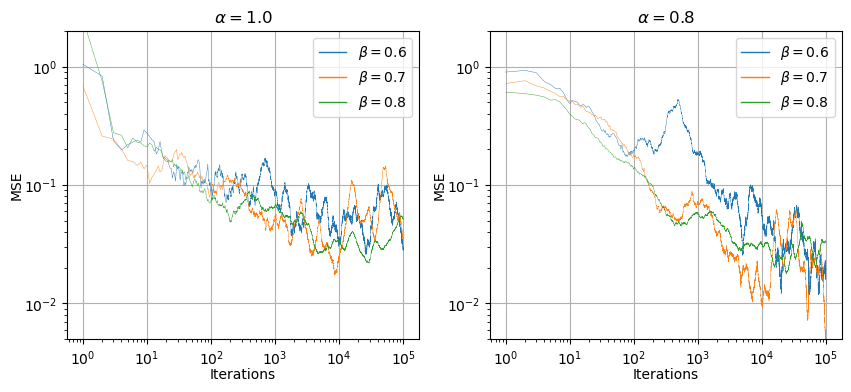

In [34]:
# L2 error of rescaled u

sol_expand = np.expand_dims(sol, axis=[0,1]).repeat(dim, axis=1).repeat(n_client, axis=0)
grad_sol = np.sum(mat_S * sol_expand, axis=2) - vec_b
bias_tmp = np.mean(np.sum(mat_S * np.expand_dims(grad_sol, axis=1).repeat(dim, axis=1), axis=2), axis=0)
bias_tmp = np.tile(bias_tmp, n_client)

                   
# for alpha < 1
inv_tmp = np.tile(mat_S_ave / n_client, [n_client, n_client])
bias_les1 = np.linalg.pinv(inv_tmp) @ bias_tmp  / prob0
bias_les1 = bias_les1[0:dim]
# bias_les2 = np.linalg.solve(inv_tmp + 1e-8 * np.identity(n_client * dim), bias_tmp) / prob0
# bias_les2 = bias_les2[0:dim]
# print(np.linalg.norm(bias_les1 - bias_les2))

# prob_seed = 1
# eta0 = 1

s = 1
# num_ite = 100000
load_path = '../workspace/LPSA/fl_mse_seed' + str(prob_seed) + '/'
plt.clf()

j = 0
plt.figure(figsize = (10, 4))

# plt.subplots_adjust(hspace=0.5)
# n_rep = 10

# for alpha in [1.0, 0.8, 0.6]:  
for alpha in [1.0, 0.8]:
    j = j + 1
    ax1 = plt.subplot(1, 2, j)
    for beta in [0.6, 0.7, 0.8]:
        if alpha > 0.99:
            inv_tmp = np.tile((mat_S_ave - (1 - beta) / eta0) / n_client, [n_client, n_client])
            bias = np.linalg.pinv(inv_tmp) @ bias_tmp / prob0
            bias = bias[0:dim]
        else:
            bias = bias_les1
        
        u_data = []
        para = 'alpha' + str(alpha) + 'beta' + str(beta)
        path = load_path + para + '/' 
        for i in range(n_rep):
            u_tmp = np.load(path + 'u' + str(i) + '.npy')
            eta_tmp = np.load(path + 'eta' + str(i) + '.npy')
            u_tmp = (u_tmp.T / eta_tmp ** (1-beta) ).T
            u_tmp = np.linalg.norm(u_tmp - bias, axis=1)**2
            u_data.append(u_tmp)
        u_data = np.array(u_data)
#         print(u_data.shape)
        u_data = np.mean(u_data, 0)
        legend_tmp = r'$\beta=$' + str(beta)
        plt.loglog(np.arange(len(u_data))[s:num_ite], u_data[s:num_ite], label=legend_tmp, linewidth=0.3)
#         plt.loglog(np.log(np.arange(len(u_data))[s:num_ite]), u_data[s:num_ite], label=legend_tmp, linewidth=0.3)
    leg = plt.legend()
    for line in leg.get_lines():
        line.set_linewidth(1)
    plt.grid()
    plt.xlabel('Iterations', labelpad=0.5)
    plt.ylabel('MSE', labelpad=0)
    plt.ylim([5e-3, 2e0])
    plt.title(r'$\alpha=$' + str(alpha))
        
#     j = j + 1
    
# plt.savefig(path + 'bias_u_over_ite.pdf', bbox_inches='tight')
plt.savefig('./figs/fl_bias_u_over_ite.pdf', bbox_inches='tight')

(9845,)
(6153,)
(813,)
(299,)
(107,)
(41,)
(18,)
(9828,)
(6665,)
(915,)
(329,)
(126,)
(46,)
(15,)


<Figure size 640x480 with 0 Axes>

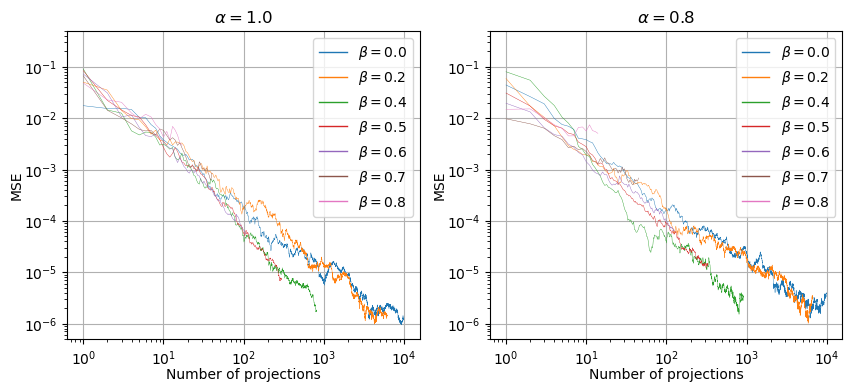

In [37]:
# plot: mse over the number of projection

s = 1
# num_ite = 100000
# beta_list = [0.0, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8]
load_path = '../workspace/LPSA/fl_mse_seed' + str(prob_seed) + '/'

plt.clf()
j = 0
plt.figure(figsize = (10, 4))
# for alpha in [1.0, 0.8, 0.6]:
for alpha in [1.0, 0.8]:
    j = j + 1
    ax1 = plt.subplot(1, 2, j)
    for beta in beta_list:
        u_data = []
        para = 'alpha' + str(alpha) + 'beta' + str(beta)
        path = load_path + para + '/' 
        min_len = num_ite
        for i in range(n_rep):
            u_tmp = np.load(path + 'mse' + str(i) + '.npy')
            f_tmp = np.load(path + 'f' + str(i) + '.npy')
            ind = f_tmp > 0
            if sum(ind > 0) < min_len:
                min_len = sum(ind > 0)
#             print(u_tmp.shape, f_tmp.shape, len(f_tmp[ind]))
            u_data.append(u_tmp[ind])
        for i in range(n_rep):
            u_data[i] = u_data[i][:min_len]
        u_data = np.array(u_data)
        u_data = np.mean(u_data, 0)
        print(u_data.shape)
        legend_tmp = r'$\beta=$' + str(beta)
        plt.loglog(np.arange(len(u_data))[s:min_len], u_data[s:min_len], label=legend_tmp, linewidth=0.3)
    leg = plt.legend()
    for line in leg.get_lines():
        line.set_linewidth(1)
    plt.grid()
    plt.xlabel('Number of projections', labelpad=0.5)
    plt.ylabel('MSE', labelpad=0)
    plt.ylim([5e-7, 5e-1])
    plt.title(r'$\alpha=$' + str(alpha))

plt.savefig('./figs/fl_mse_over_proj.pdf', bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

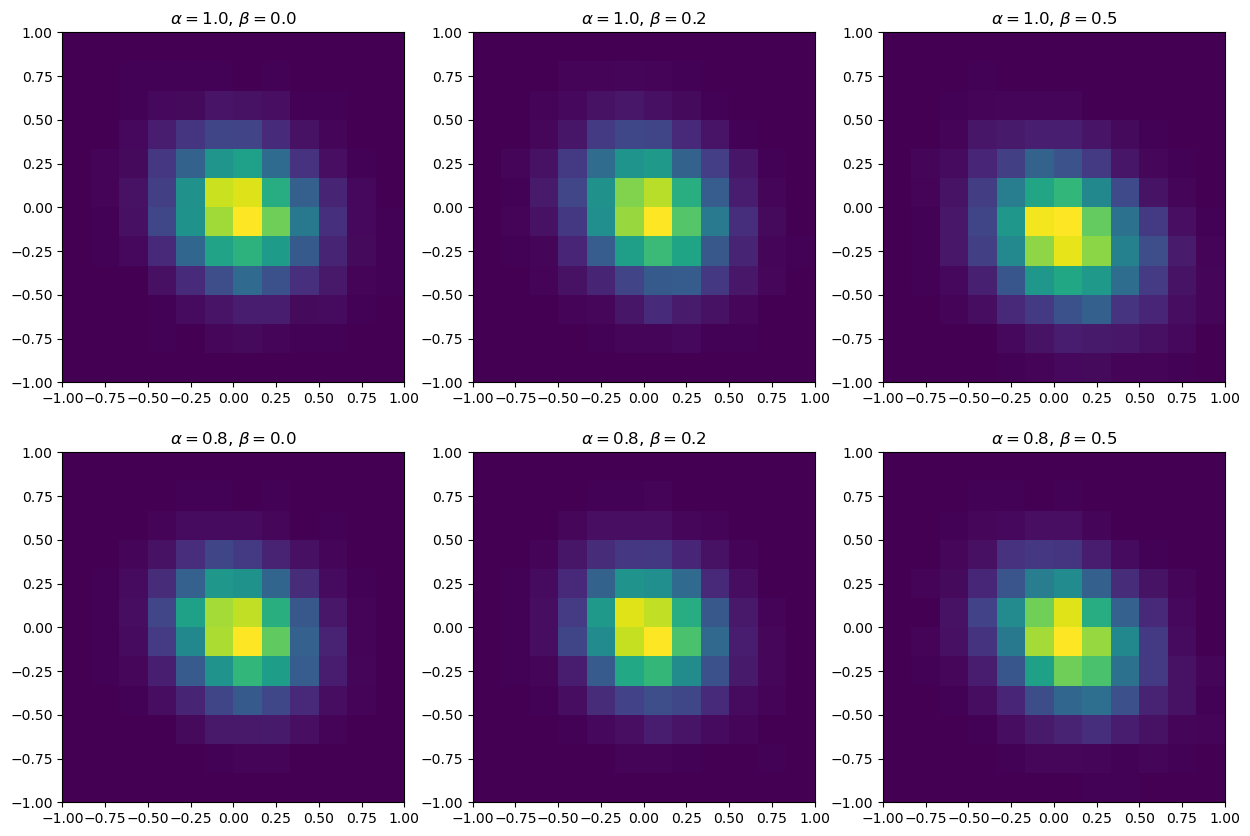

In [25]:
# plot heatmap

prob_seed = 7

n_bins = 12
# num_ite = 100000
load_path = '../workspace/LPSA/fl_heatmap_seed' + str(prob_seed) + '/'

para_list = ['alpha1.0beta0.0', 'alpha1.0beta0.2','alpha1.0beta0.5','alpha0.8beta0.0', 'alpha0.8beta0.2', 'alpha0.8beta0.5']
# para_list = ['alpha1.0beta0.5', 'alpha0.8beta0.5']
# plt.subplots_adjust(hspace=0.5)

plt.clf()
plt.figure(figsize = (15, 10))
# plt.figure(figsize = (20, 10))
j = 0

sol_expand = np.expand_dims(sol, axis=[0,1]).repeat(dim, axis=1).repeat(n_client, axis=0)
grad_sol = np.sum(mat_S * sol_expand, axis=2) - vec_b
bias_tmp = np.mean(np.sum(mat_S * np.expand_dims(grad_sol, axis=1).repeat(dim, axis=1), axis=2), axis=0)
bias_tmp = np.tile(bias_tmp, n_client)
# for alpha < 1
inv_tmp = np.tile(np.mean(mat_S, axis=0), [n_client, n_client]) / n_client
bias_les1 = np.linalg.pinv(inv_tmp) @ bias_tmp  / prob0
bias_les1 = bias_les1[0:dim]

for para in para_list:
    alpha = float(para[5:8])
    beta = float(para[12:15])
    path = load_path + para + '/' 
    j = j + 1
    
    ax1 = plt.subplot(2, 3, j)

    u_data = np.load(path + 'u' + '.npy')
#     print(u_data.shape)
    if abs(beta - 0.5) < 1e-8:
        if alpha > 0.99:
            inv_tmp = np.tile((mat_S_ave - (1 - beta) / eta0) / n_client, [n_client, n_client])
            bias = np.linalg.pinv(inv_tmp) @ bias_tmp / prob0
            bias = bias[0:dim]
        else:
            bias = bias_les1
        u_data = u_data - bias
    
#     hist_range = [[-0.75, 0.75], [-0.75, 0.75]]
    hist_range = [[-1, 1], [-1, 1]]
    plt.hist2d(u_data[:,0], u_data[:,1], bins=n_bins, range=hist_range)
#     heatmap, xedges, yedges = np.histogram2d(u_data[:,0], u_data[:,1], bins=n_bins)
#     xy_min = min(xedges[0], yedges[0])
#     xy_max = max(xedges[-1], yedges[-1])
#     # extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
#     extent = [xy_min, xy_max, xy_min, xy_max]
#     plt.imshow(heatmap.T, extent=extent, origin='lower')
    plt.title(r'$\alpha=$' + str(alpha) + r', $\beta=$' + str(beta))
    
#     if abs(beta - 0.5) < 1e-8:
#         j = j + 1
#         ax1 = plt.subplot(2, 4, j)
#         if alpha > 0.99:
# #             var_tmp = np.tile((mat_S_ave - 1 / 2 / eta0) / n_client, [n_client, n_client])
#             var_tmp = (mat_S_ave - 1 / 2 / eta0) / n_client
#         else:
# #             var_tmp = np.tile(mat_S_ave / n_client, [n_client, n_client])
#             var_tmp = mat_S_ave / n_client
# #         var_tmp2 = np.tile(var * np.identity(dim) / n_client, [n_client, n_client])
# #         inv_tmp2 = np.kron(var_tmp2, np.identity(dim * n_client)) + np.kron(np.identity(dim * n_client), var_tmp)
#         var_tmp2 = var * np.identity(dim) / n_client
#         inv_tmp2 = np.kron(var_tmp2, np.identity(dim)) + np.kron(np.identity(dim), var_tmp)
# #         print(inv_tmp2.shape, var_tmp2.shape)
# #         var_asp = np.linalg.solve(inv_tmp2, var_tmp2.reshape(-1)).reshape((dim * n_client, dim * n_client))
# #         var_asp = var_asp[:dim, :dim]
#         var_asp = np.linalg.solve(inv_tmp2, var_tmp2.reshape(-1)).reshape((dim, dim)) / n_client
#         [tmp_D, tmp_U] = np.linalg.eig(var_asp)
#         var_asp_sqrt = (np.sqrt(tmp_D) * tmp_U) @ tmp_U.T

#         var_rand = var_asp_sqrt @ np.random.randn(dim, 10000)
# #         plt.hist2d(var_rand[0,:], var_rand[1,:], bins=n_bins)
#         plt.hist2d(var_rand[0,:], var_rand[1,:], range=hist_range, bins=n_bins)
#         plt.title(r'limiting distribution for $\alpha=$'+ str(alpha))
    
plt.savefig('./figs/fl_heatmap.pdf', bbox_inches='tight')

In [72]:
a = np.arange(24).reshape((4,3,2))
b = np.arange(8).reshape((4,2))
# a.reshape((-1,2))
b = np.expand_dims(b, axis=1).repeat(3, axis=1) #.reshape((-1,2))
np.sum(a * b, axis=2) 
# np.tensordot(a, b, axes=([2,1])).shape

a =  np.array([1,2])
aa = np.expand_dims(a, axis=[0, 1]).repeat(5, axis=0).repeat(2, axis=1).shape
a = np.array([[0,1], [2,3]])
np.tile(a, [5,5])

sol_expand = np.expand_dims(sol, axis=[0,1]).repeat(dim, axis=1).repeat(n_client, axis=0)
grad_sol = np.sum(mat_S * sol_expand, axis=2) - vec_b
bias_tmp = np.mean(np.sum(mat_S * np.expand_dims(grad_sol, axis=1).repeat(dim, axis=1), axis=2), axis=0)
bias_tmp = np.tile(bias_tmp, n_client)
                   
# for alpha < 1
inv_tmp = np.tile(np.mean(mat_S, axis=0), [n_client, n_client])
bias_les1 = np.linalg.pinv(inv_tmp) @ bias_tmp  / prob0
print(bias_les1)

[-0.0369032  -0.08621308 -0.0369032  -0.08621308 -0.0369032  -0.08621308
 -0.0369032  -0.08621308 -0.0369032  -0.08621308]


In [121]:
# 1 dim

dim = 1
n_client = 5
mu = 1
var = 1

# generate the problem
prob_seed = 1
np.random.seed(prob_seed)
mat_S_list = []
vec_b_list = []
for i in range(n_client):
    mat_tmp = np.random.randn(dim, dim) / np.sqrt(dim)
    mat_tmp = mat_tmp @ mat_tmp.T
    mat_tmp = mat_tmp + mu * np.identity(dim)
    mat_S_list.append(mat_tmp)
    vec_b_list.append(np.random.randn(dim))
mat_S = np.array(mat_S_list)
vec_b = np.array(vec_b_list)
print(mat_S.shape)
print(vec_b.shape)

# solve the problem
mat_S_ave = np.mean(mat_S, axis=0)
vec_b_ave = np.mean(vec_b, axis=0)
sol = np.linalg.inv(mat_S_ave) @ vec_b_ave
print(sol)

(5, 1, 1)
(5, 1)
[-0.42301129]


In [124]:
alpha_list = [1.0, 0.8]

# beta_list = [0.0, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8]
beta_list = [0.5, 0.6, 0.7, 0.8]


# seed = 1
eta0 = 1
eta00 = 0.2

prob00 = 0.1 # initial value for beta = 0
prob0 = 0.5 # initial value for beta > 0
n_ite = 100000
n_rep = 10

store_path = '../workspace/LPSA/flonedim_mse_seed' + str(prob_seed) + '/'

# np.random.seed(0)
# x00 = np.random.randn(n_client, dim)

for alpha in alpha_list:
    for beta in beta_list:
        para = 'alpha' + str(alpha) + 'beta' + str(beta)
        path = store_path + para + '/'
        if not os.path.exists(path):
            os.makedirs(path)
            
        if alpha > 0.99:
            eta_ini = eta0
        else:
            eta_ini = eta00
        # print(eta_ini)

        for j in range(n_rep):
            np.random.seed(j)
            x0 = np.random.randn(n_client, dim)
            u_list = []
            v_list = []
            mse_list = []
            loss_list = []
            eta_list = []
            f_list = []
            x = x0
            for i in range(n_ite):
                eta = eta_ini / (i+1) ** alpha
                noise = np.sqrt(var) * np.random.randn(n_client, dim)
#                 print(mat_S.shape, x.shape)
                grad = np.sum(mat_S * np.expand_dims(x, axis=1).repeat(dim, axis=1), axis=2) - vec_b
                x = x - eta * (grad + noise)
                u = np.mean(x, axis=0)

                if beta > 0.01:
                    prob = prob0 * eta ** beta
                else:
                    prob = prob00
                prob = min(prob, 1)
                f = np.random.binomial(1, prob)

                if f > 0:
                    x = np.repeat(np.expand_dims(u, axis=0), 5, axis=0)
                v = x - u
                u_list.append(u - sol)
                v_list.append(v)
                mse = np.linalg.norm(u - sol) ** 2
#                 loss = np.dot(mat_S @ u, u) / 2 - np.dot(u, vec_b)
                mse_list.append(mse)
#                 loss_list.append(loss - loss_min)
                eta_list.append(eta)
                f_list.append(f)

            np.save(path + 'mse' + str(j) + '.npy', np.array(mse_list))
#             np.save(path + 'loss' + str(j) + '.npy', np.array(loss_list))
            np.save(path + 'eta' + str(j) + '.npy', np.array(eta_list))
            np.save(path + 'u' + str(j) + '.npy', np.array(u_list))
#             np.save(path + 'v' + str(j) + '.npy', np.array(v_list))
#             np.save(path + 'f' + str(j) + '.npy', np.array(f_list))

        print(para, j, 'done\n')

alpha1.0beta0.5 9 done

alpha1.0beta0.6 9 done

alpha1.0beta0.7 9 done

alpha1.0beta0.8 9 done

alpha0.8beta0.5 9 done

alpha0.8beta0.6 9 done

alpha0.8beta0.7 9 done

alpha0.8beta0.8 9 done



(5, 1, 1) (5, 1, 1)
1.887001555012091e-09


<Figure size 640x480 with 0 Axes>

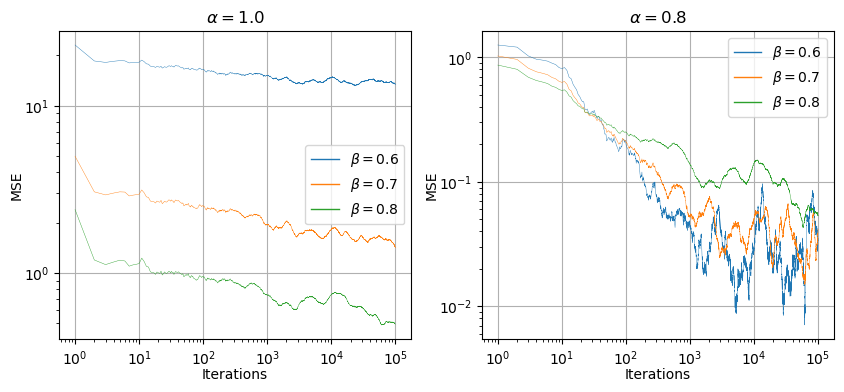

In [130]:
# L2 error of rescaled u

# mat_S1 = np.diag(mat_S.squeeze())
# vec_b1 = vec_b_1d.squeeze()
# bias_tmp = mat_S1 @ (mat_S1 @ np.tile(sol, n_client) - vec_b1)
# bias_tmp = np.tile(np.mean(bias_tmp), n_client)





sol_expand = np.expand_dims(sol, axis=[0,1]).repeat(dim, axis=1).repeat(n_client, axis=0)
print(sol_expand.shape, mat_S.shape)
grad_sol = np.sum(mat_S * sol_expand, axis=2) - vec_b
bias_tmp = np.mean(np.sum(mat_S * np.expand_dims(grad_sol, axis=1).repeat(dim, axis=1), axis=2), axis=0)
bias_tmp = np.tile(bias_tmp, n_client)

                   
# for alpha < 1
inv_tmp = np.tile(mat_S_ave, [n_client, n_client]) / n_client
# print(inv_tmp)
# raise
bias_les1 = np.linalg.pinv(inv_tmp) @ bias_tmp  / prob0
bias_les1 = bias_les1[0:dim]
bias_les2 = np.linalg.solve(inv_tmp + 1e-8 * np.identity(n_client * dim), bias_tmp) / prob0
bias_les2 = bias_les2[0:dim]
print(np.linalg.norm(bias_les1 - bias_les2))
# raise

# prob_seed = 1
# eta0 = 1

s = 1
# num_ite = 100000
load_path = '../workspace/LPSA/flonedim_mse_seed' + str(prob_seed) + '/'
plt.clf()

j = 0
plt.figure(figsize = (10, 4))

# plt.subplots_adjust(hspace=0.5)
# n_rep = 10

for alpha in [1.0, 0.8]:    
    j = j + 1
    ax1 = plt.subplot(1, 2, j)
    for beta in [0.6, 0.7, 0.8]:
        if alpha > 0.99:
            inv_tmp = np.tile(np.mean(mat_S, axis=0) / n_client - (1 - beta) / eta0, [n_client, n_client])
            bias = np.linalg.pinv(inv_tmp) @ bias_tmp / prob0
            bias = bias[0:dim]
        else:
            bias = bias_les1
        
        u_data = []
        para = 'alpha' + str(alpha) + 'beta' + str(beta)
        path = load_path + para + '/' 
        for i in range(n_rep):
            u_tmp = np.load(path + 'u' + str(i) + '.npy')
            eta_tmp = np.load(path + 'eta' + str(i) + '.npy')
            u_tmp = (u_tmp.T / eta_tmp ** (1-beta) ).T
            u_tmp = np.linalg.norm(u_tmp - bias, axis=1)**2
            u_data.append(u_tmp)
        u_data = np.array(u_data)
#         print(u_data.shape)
        u_data = np.mean(u_data, 0)
        legend_tmp = r'$\beta=$' + str(beta)
        plt.loglog(np.arange(len(u_data))[s:num_ite], u_data[s:num_ite], label=legend_tmp, linewidth=0.3)
#         plt.loglog(np.log(np.arange(len(u_data))[s:num_ite]), u_data[s:num_ite], label=legend_tmp, linewidth=0.3)
    leg = plt.legend()
    for line in leg.get_lines():
        line.set_linewidth(1)
    plt.grid()
    plt.xlabel('Iterations', labelpad=0.5)
    plt.ylabel('MSE', labelpad=0)
#     plt.ylim([1e-6, 1e-0])
    plt.title(r'$\alpha=$' + str(alpha))

<Figure size 640x480 with 0 Axes>

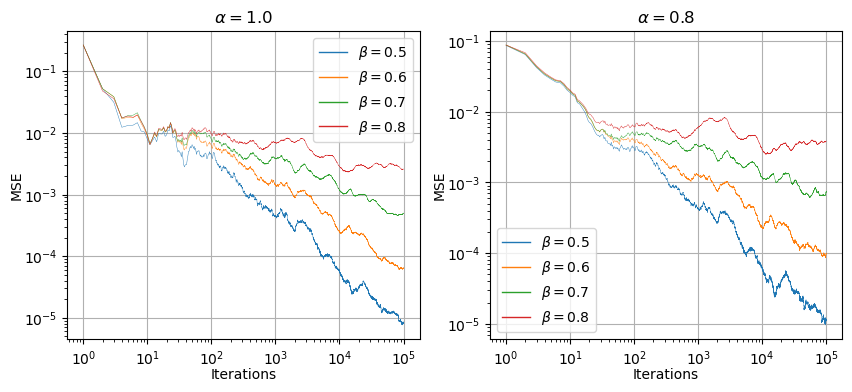

In [126]:
s = 1
# num_ite = 10000
num_ite = n_ite
# beta_list = [0.0, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8]
# load_path = '../workspace/LPSA/mse_seed' + str(prob_seed) + '/'
load_path = '../workspace/LPSA/flonedim_mse_seed' + str(prob_seed) + '/'

plt.clf()
j = 0
plt.figure(figsize = (10, 4))
for alpha in [1.0, 0.8]:
    j = j + 1
    ax1 = plt.subplot(1, 2, j)
    for beta in beta_list:
        u_data = []
        para = 'alpha' + str(alpha) + 'beta' + str(beta)
#         alpha = para[2:5]
#         beta = para[9:]
        path = load_path + para + '/' 
        for i in range(n_rep):
            u_data.append(np.load(path + 'mse' + str(i) + '.npy'))
        u_data = np.array(u_data)
        u_data = np.mean(u_data, 0)
        legend_tmp = r'$\beta=$' + str(beta)
        plt.loglog(np.arange(len(u_data))[s:num_ite], u_data[s:num_ite], label=legend_tmp, linewidth=0.3)
    leg = plt.legend()
    for line in leg.get_lines():
        line.set_linewidth(1)
    plt.grid()
    plt.xlabel('Iterations', labelpad=0.5)
    plt.ylabel('MSE', labelpad=0)
#     plt.ylim([1e-6, 1e-0])
    plt.title(r'$\alpha=$' + str(alpha))
